## Predição de usuários de bike com regressão Linear

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#### Dicionário de dados

hr: Hour (0 to 23)
    
weathersit: (extracted from Freemeteo)
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
    
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
    
hum: Normalized humidity. The values are divided to 100 (max)
    
windspeed: Normalized wind speed. The values are divided to 67 (max)
    
casual: count of casual users

### Analise descritiva e diagnóstica

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,3094,2011-05-13,20,2,0.52,0.5000,0.83,0.1343,22,152
1,10645,2012-03-24,16,3,0.50,0.4848,0.94,0.2985,49,177
2,2114,2011-04-02,23,1,0.32,0.3182,0.61,0.1642,20,53
3,15289,2012-10-04,6,3,0.62,0.5455,0.94,0.0896,1,133
4,2273,2011-04-09,14,2,0.36,0.3485,0.81,0.1343,94,212


In [3]:
faltantes = pd.DataFrame({'colunas':df.columns, 
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':df.isna().sum()/df.shape[0],
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,Unnamed: 0,Unnamed: 0,int64,0,0.0,10948
1,dteday,dteday,object,0,0.0,731
2,hr,hr,int64,0,0.0,24
3,weathersit,weathersit,int64,0,0.0,4
4,temp,temp,float64,0,0.0,50
5,atemp,atemp,float64,0,0.0,64
6,hum,hum,float64,0,0.0,88
7,windspeed,windspeed,float64,0,0.0,29
8,casual,casual,int64,0,0.0,299
9,cnt,cnt,int64,0,0.0,820


Tem nenhum dado faltante

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit', ylabel='count'>

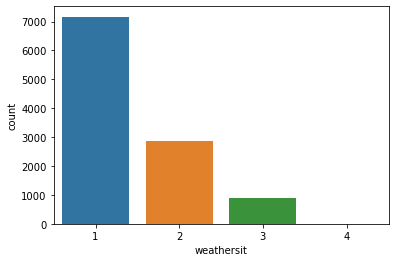

In [4]:
sns.countplot(df.weathersit)

<AxesSubplot:xlabel='temp', ylabel='Count'>

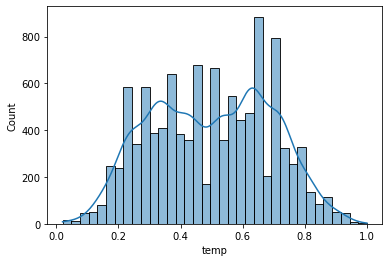

In [5]:
sns.histplot(data = df.temp, kde=True)


<AxesSubplot:xlabel='atemp', ylabel='Count'>

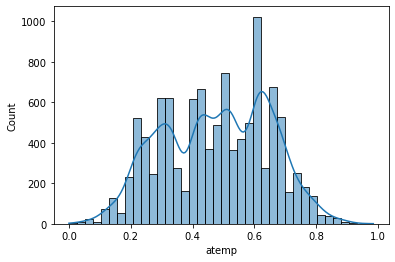

In [6]:
sns.histplot(data = df.atemp, kde=True)


<AxesSubplot:xlabel='hum', ylabel='Count'>

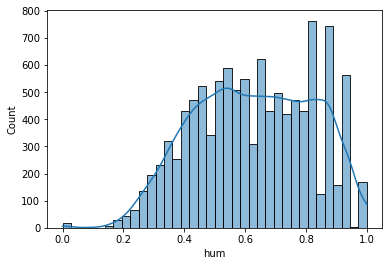

In [7]:
sns.histplot(data = df.hum, kde=True)


<AxesSubplot:xlabel='windspeed', ylabel='Count'>

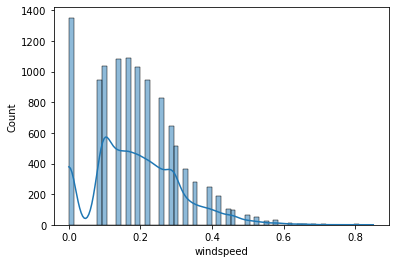

In [8]:
sns.histplot(data = df.windspeed, kde=True)


<AxesSubplot:xlabel='cnt', ylabel='Count'>

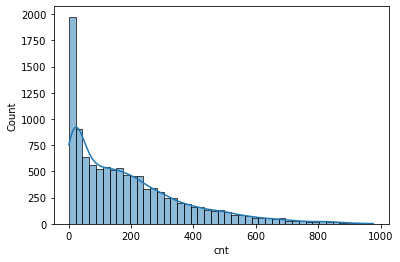

In [9]:
sns.histplot(data = df.cnt, kde=True)


In [10]:
df =df.set_index(df.dteday)

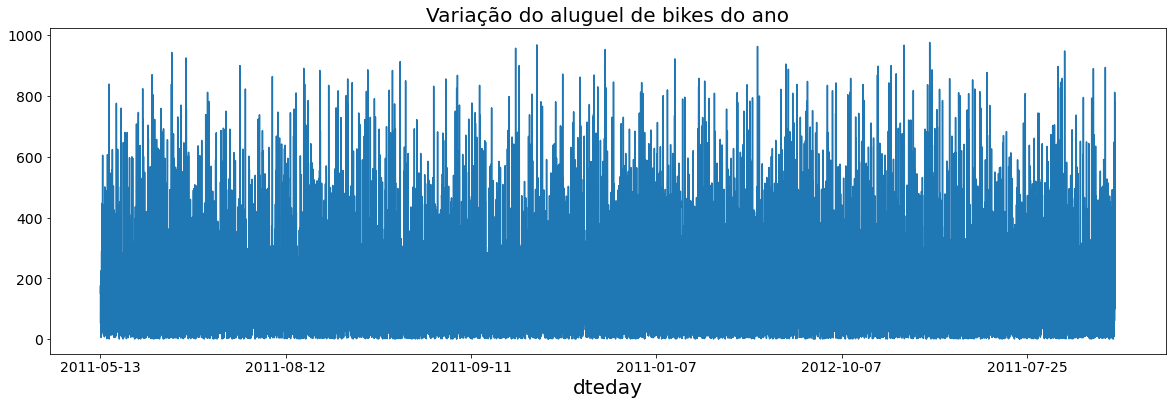

In [11]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_title('Variação do aluguel de bikes do ano',fontsize=20)
ax.set_xlabel('Dias',fontsize=20)
ax = df['cnt'].plot(fontsize=14)

In [12]:
df.describe()

,Unnamed: 0,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt
count,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000
mean,8692.054074,11.584034,1.427749,0.498230,0.477251,0.627739,0.189384,35.937980,191.253562
std,5022.534466,6.915254,0.640282,0.192784,0.172065,0.193287,0.121738,49.174875,182.541867
min,1.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4331.750000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,40.000000
50%,8682.500000,12.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,145.000000
75%,13047.000000,18.000000,2.000000,0.660000,0.621200,0.790000,0.253700,49.000000,282.000000
max,17378.000000,23.000000,4.000000,1.000000,0.984800,1.000000,0.850700,367.000000,976.000000


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

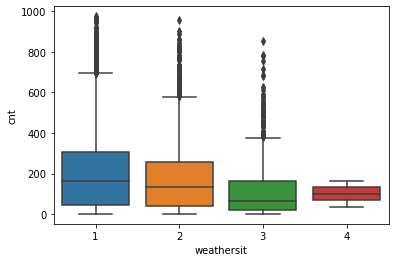

In [13]:
sns.boxplot(x='weathersit',y='cnt',data=df)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

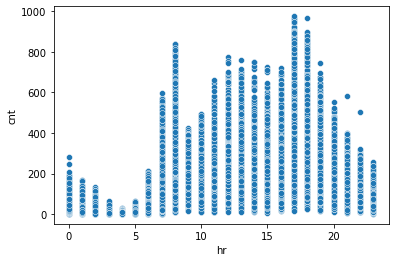

In [14]:
sns.scatterplot(x='hr',y='cnt',data=df)


<AxesSubplot:xlabel='hr', ylabel='cnt'>

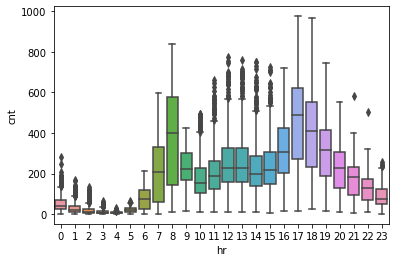

In [15]:
sns.boxplot(x='hr',y='cnt',data=df)

In [16]:
hrs = pd.DataFrame(df['hr'])

bins = [0,5, 10, 15, 20, 23]
labels = ['0-4', '5-9', '10-14', '15-19', '20+']
hrs['hrrange'] = pd.cut(hrs.hr, bins, labels = labels,include_lowest = True)


In [17]:
df_final = pd.concat([df, hrs.hrrange], axis=1)

In [19]:
#rp = sns.FacetGrid(df_final, row="hrrange", hue="hrrange", aspect=5, height=1.25)
  
#rp.map(sns.kdeplot, 'cnt', clip_on=False,
 #      shade=True, alpha=0.7, lw=4, bw=.2)
  
#rp.map(plt.axhline, y=0, lw=4, clip_on=False)
#plt.title()

Text(0.5, 1.05, 'Disperção entre as variaveis')

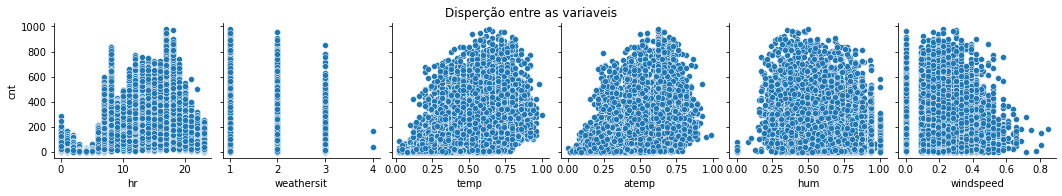

In [20]:
ax = sns.pairplot(df,y_vars='cnt',x_vars=['hr','weathersit','temp','atemp','hum','windspeed'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

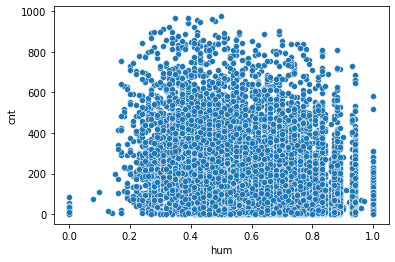

In [21]:
sns.scatterplot(x='hum',y='cnt',data=df)


humidade abaixo de 0.2 tem uma quantidade pequena de pessoas pegando bike. O mesmo ocorre quando a umidade vai aumentando e quando chega em 1 ele diminui bastante

## Feature Engineering

In [22]:
hums = pd.DataFrame(df['hum'])

bins = [0,0.3, 0.6,0.9, 1]
labels = ['0-0.2', '0.3-0.5', '0.6-0.8', '0.9+']
hums['humrange'] = pd.cut(hums.hum, bins, labels = labels,include_lowest = True)


In [23]:
hums

,hum,humrange
dteday,,
2011-05-13,0.83,0.6-0.8
2012-03-24,0.94,0.9+
2011-04-02,0.61,0.6-0.8
2012-10-04,0.94,0.9+
2011-04-09,0.81,0.6-0.8
...,...,...
2012-04-20,0.88,0.6-0.8
2012-05-18,0.34,0.3-0.5
2011-08-17,0.43,0.3-0.5


In [24]:
df_final = pd.concat([df_final, hums.humrange], axis=1)

In [27]:
df_final

,Unnamed: 0,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt,hrrange,humrange
dteday,,,,,,,,,,,,
2011-05-13,3094,2011-05-13,20,2,0.52,0.5000,0.83,0.1343,22,152,15-19,0.6-0.8
2012-03-24,10645,2012-03-24,16,3,0.50,0.4848,0.94,0.2985,49,177,15-19,0.9+
2011-04-02,2114,2011-04-02,23,1,0.32,0.3182,0.61,0.1642,20,53,20+,0.6-0.8
2012-10-04,15289,2012-10-04,6,3,0.62,0.5455,0.94,0.0896,1,133,5-9,0.9+
2011-04-09,2273,2011-04-09,14,2,0.36,0.3485,0.81,0.1343,94,212,10-14,0.6-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-20,11284,2012-04-20,9,1,0.46,0.4545,0.88,0.0896,30,359,5-9,0.6-0.8
2012-05-18,11964,2012-05-18,17,1,0.66,0.6212,0.34,0.1343,124,812,15-19,0.3-0.5
2011-08-17,5390,2011-08-17,12,1,0.80,0.7273,0.43,0.2836,26,189,10-14,0.3-0.5


In [29]:
df_final.drop(columns='dteday',inplace=True)

In [30]:
df_final = df_final.reset_index()

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-p

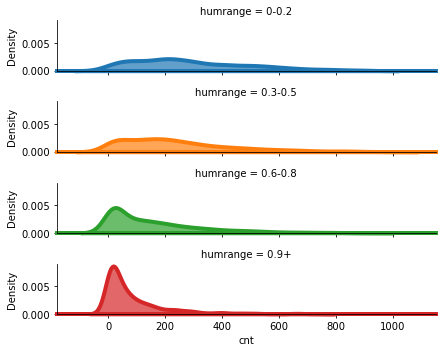

In [31]:
rp = sns.FacetGrid(df_final, row="humrange", hue="humrange", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'cnt', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)
#plt.title()

<AxesSubplot:xlabel='humrange', ylabel='cnt'>

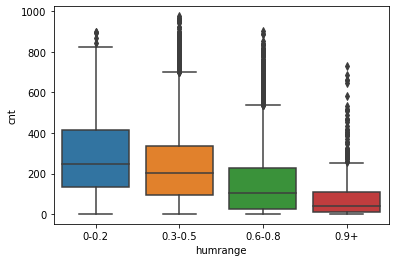

In [32]:
sns.boxplot(x='humrange',y='cnt',data=df_final)

In [33]:
df_final.columns

Index(['dteday', 'Unnamed: 0', 'hr', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'cnt', 'hrrange', 'humrange'],
      dtype='object')

In [34]:
wind = pd.DataFrame(df_final['windspeed'])

bins = [0,0.3, 0.6,0.8]
labels = ['0-0.2', '0.3-0.5', '0.6+']
wind['windspeedrange'] = pd.cut(wind.windspeed, bins, labels = labels,include_lowest = True)


In [35]:
df_final = pd.concat([df_final, wind.windspeedrange], axis=1)

<AxesSubplot:xlabel='windspeedrange', ylabel='cnt'>

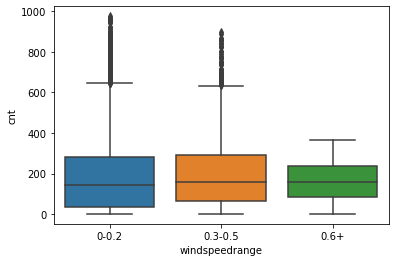

In [36]:
sns.boxplot(x='windspeedrange',y='cnt',data=df_final)

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


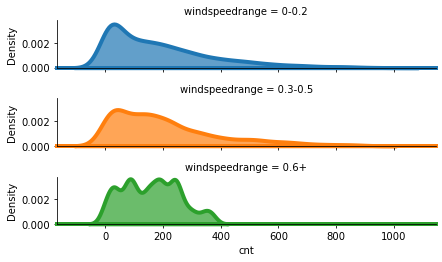

In [37]:
rp = sns.FacetGrid(df_final, row="windspeedrange", hue="windspeedrange", aspect=5, height=1.25)
  
rp.map(sns.kdeplot, 'cnt', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)
#plt.title()

In [38]:
dummies = pd.get_dummies(df_final[['windspeedrange','humrange','hrrange']])
df_final = pd.concat([df_final, dummies], axis=1)

In [39]:
df_final.head()

,dteday,Unnamed: 0,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt,...,windspeedrange_0.6+,humrange_0-0.2,humrange_0.3-0.5,humrange_0.6-0.8,humrange_0.9+,hrrange_0-4,hrrange_5-9,hrrange_10-14,hrrange_15-19,hrrange_20+
0,2011-05-13,3094,20,2,0.52,0.5000,0.83,0.1343,22,152,...,0,0,0,1,0,0,0,0,1,0
1,2012-03-24,10645,16,3,0.50,0.4848,0.94,0.2985,49,177,...,0,0,0,0,1,0,0,0,1,0
2,2011-04-02,2114,23,1,0.32,0.3182,0.61,0.1642,20,53,...,0,0,0,1,0,0,0,0,0,1
3,2012-10-04,15289,6,3,0.62,0.5455,0.94,0.0896,1,133,...,0,0,0,0,1,0,1,0,0,0
4,2011-04-09,2273,14,2,0.36,0.3485,0.81,0.1343,94,212,...,0,0,0,1,0,0,0,1,0,0


## Teste de normalidade

In [40]:
from scipy.stats import normaltest

In [41]:
significancia = 0.05

In [42]:
stat_test, p_valor = normaltest(df.cnt)
print(stat_test)
print(p_valor)


2151.733018757695
0.0


In [43]:
p_valor <= significancia

True

Não é proveniente de uma distribuição normal, eu rejeito essa hipótese aqui totalmente. Visualmente a gente confirma isso e, agora, com uma estatística mais formal, a gente também confirma isso. Então provavelmente a Regressão linear não terá um bom desempenho

## Seleção de variável

<AxesSubplot:>

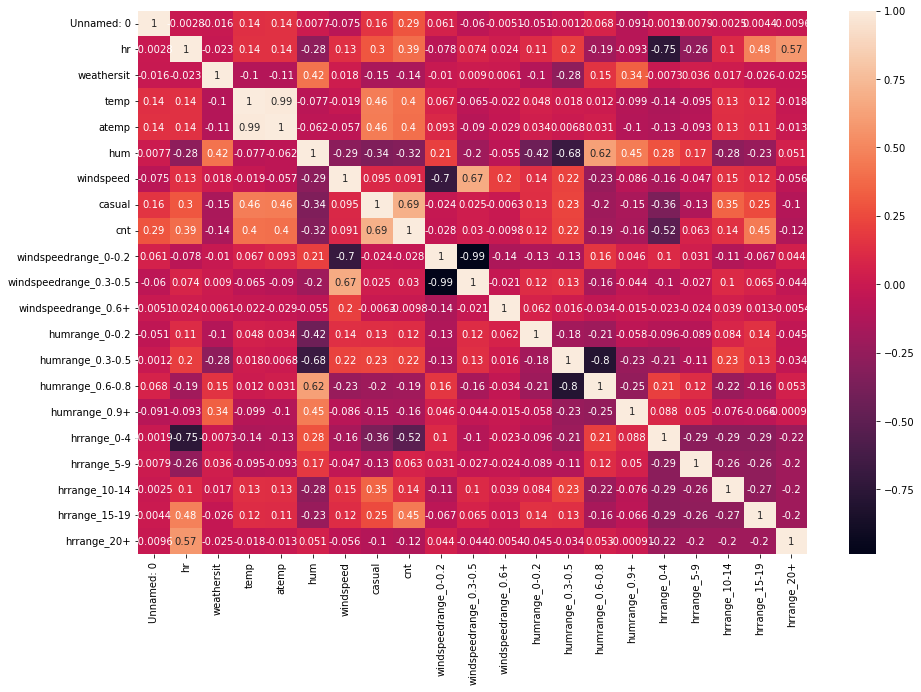

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),annot=True)

## Seleção de variáveis usando RFE

In [ ]:
#!pip install yellowbrick

In [45]:
X = df_final.drop(columns=['Unnamed: 0', 'dteday','casual', 'cnt', 'hrrange', 'humrange','windspeedrange','hr','hum','windspeed'])
y= df_final.cnt

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)


In [47]:
from yellowbrick.features import RFECV


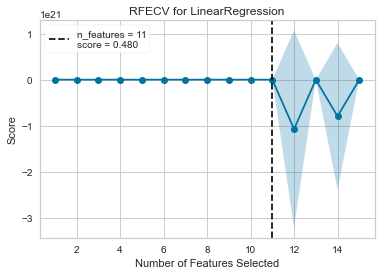

<AxesSubplot:title={'center':'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [48]:
fig,ax = plt.subplots(figsize=(6,4))

rfe = RFECV(LinearRegression(),cv=5)
rfe.fit(X_train,y_train)
rfe.poof()

In [49]:
rfe.rfe_estimator_.ranking_

array([5, 4, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
rfe.rfe_estimator_.n_features_

11

In [51]:
rfe.rfe_estimator_.support_

array([False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [52]:
X_train.columns

Index(['weathersit', 'temp', 'atemp', 'windspeedrange_0-0.2',
       'windspeedrange_0.3-0.5', 'windspeedrange_0.6+', 'humrange_0-0.2',
       'humrange_0.3-0.5', 'humrange_0.6-0.8', 'humrange_0.9+', 'hrrange_0-4',
       'hrrange_5-9', 'hrrange_10-14', 'hrrange_15-19', 'hrrange_20+'],
      dtype='object')

'atemp', 'windspeedrange_0-0.2','humrange_0-0.2',
       'humrange_0.3-0.5', 'humrange_0.6-0.8', 'humrange_0.9+', 'hrrange_0-4',
       'hrrange_5-9', 'hrrange_10-14', 'hrrange_15-19', 'hrrange_20+'

In [53]:
df_final.columns

Index(['dteday', 'Unnamed: 0', 'hr', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'cnt', 'hrrange', 'humrange', 'windspeedrange',
       'windspeedrange_0-0.2', 'windspeedrange_0.3-0.5', 'windspeedrange_0.6+',
       'humrange_0-0.2', 'humrange_0.3-0.5', 'humrange_0.6-0.8',
       'humrange_0.9+', 'hrrange_0-4', 'hrrange_5-9', 'hrrange_10-14',
       'hrrange_15-19', 'hrrange_20+'],
      dtype='object')

## Quebrando os dados em teste e treino

In [54]:
X = df_final.drop(columns=['Unnamed: 0', 'dteday','casual', 'cnt', 'hrrange', 'humrange','windspeedrange',
       'windspeedrange_0-0.2', 'windspeedrange_0.3-0.5', 'windspeedrange_0.6+',
       'humrange_0-0.2', 'humrange_0.3-0.5', 'humrange_0.6-0.8',
       'humrange_0.9+', 'hrrange_0-4', 'hrrange_5-9', 'hrrange_10-14',
       'hrrange_15-19', 'hrrange_20+'])
y= df_final.cnt

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)


In [56]:
X.columns

Index(['hr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [57]:
X_2 = df_final[['atemp', 'windspeedrange_0-0.2','humrange_0-0.2',
       'humrange_0.3-0.5', 'humrange_0.6-0.8', 'humrange_0.9+', 'hrrange_0-4',
       'hrrange_5-9', 'hrrange_10-14', 'hrrange_15-19', 'hrrange_20+']]

y= df_final.cnt

In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.3, random_state=2811)


## Construindo o modelo

In [59]:
rl = LinearRegression()


In [60]:
rl.fit(X_train, y_train)


LinearRegression()

In [61]:
lm = rl.predict(X_test)


In [62]:
lm

array([317.67242238, 111.58975482, 414.01685443, ..., 187.36757534,
       352.70734695, 221.80187243])

In [63]:
print("R quadrado = {}".format(r2_score(y_test, lm).round(2)))

R quadrado = 0.33


In [66]:
from sklearn.metrics import mean_absolute_percentage_error

In [68]:
mean_absolute_percentage_error(y_test, lm)

2.980539471536523

Em média o modelo está errando 2.98% do valor real 

In [71]:
#print("MAE = {}".format(mean_absolute_error(y_test, lm)))

Em média nosso modelo está errando em média 107 usuários para cima e para baixo do valor real

In [72]:
index = ['Intercept','hr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

In [73]:
pd.DataFrame(data=np.append(rl.intercept_,rl.coef_), index=index,columns=['Parametros'])


,Parametros
Intercept,62.780971
hr,7.217246
weathersit,-3.339205
temp,74.914009
atemp,289.757305
hum,-202.843956
windspeed,8.410257


## Construindo o segundo modelo com base na seleção

In [74]:
rl_2 = LinearRegression()


In [75]:
rl_2.fit(X_train_2, y_train_2)


LinearRegression()

In [76]:
lm_2 = rl_2.predict(X_test_2)


In [77]:
lm_2

array([403., 161., 458., ...,  88., 185., 295.])

In [78]:
print("R quadrado = {}".format(r2_score(y_test_2, lm_2).round(2)))

R quadrado = 0.5


In [79]:
print("MAPE = {}".format(mean_absolute_percentage_error(y_test_2, lm_2)))

MAPE = 2.1877858224836597


Em média nosso modelo está errando em média 2.18% do valor real

In [80]:
X_train_2.columns

Index(['atemp', 'windspeedrange_0-0.2', 'humrange_0-0.2', 'humrange_0.3-0.5',
       'humrange_0.6-0.8', 'humrange_0.9+', 'hrrange_0-4', 'hrrange_5-9',
       'hrrange_10-14', 'hrrange_15-19', 'hrrange_20+'],
      dtype='object')

In [81]:
index = ['Intercept','atemp', 'windspeedrange_0-0.2', 'humrange_0-0.2', 'humrange_0.3-0.5',
       'humrange_0.6-0.8', 'humrange_0.9+', 'hrrange_0-4', 'hrrange_5-9',
       'hrrange_10-14', 'hrrange_15-19', 'hrrange_20+']

In [82]:
pd.DataFrame(data=np.append(rl_2.intercept_,rl_2.coef_), index=index,columns=['Parametros'])


,Parametros
Intercept,-4.044845e+15
atemp,3.311525e+02
windspeedrange_0-0.2,1.753410e+01
humrange_0-0.2,1.361131e+15
humrange_0.3-0.5,1.361131e+15
humrange_0.6-0.8,1.361131e+15
humrange_0.9+,1.361131e+15
hrrange_0-4,2.683714e+15
hrrange_5-9,2.683714e+15
hrrange_10-14,2.683714e+15


## Análise dos resíduos

<AxesSubplot:ylabel='cnt'>

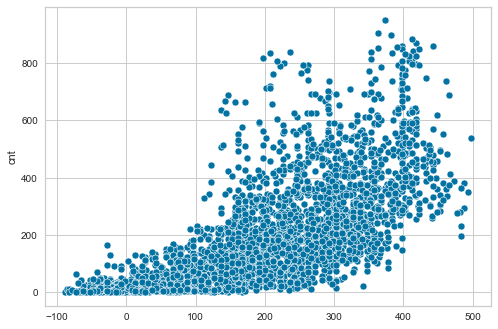

In [83]:
ax = sns.scatterplot(x = lm_2,y=y_test_2)
ax

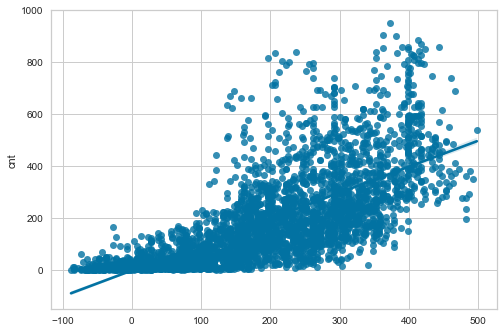

In [84]:
ax = sns.regplot(x = lm_2,y=y_test_2)


In [85]:
residuo = y_test_2 - lm_2


/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Aluguel de bikes Previsão X Real'}, xlabel='Aluguel de bikes - Previsto', ylabel='Residuo'>

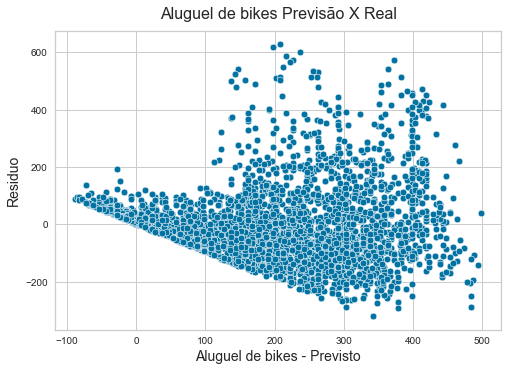

In [86]:
ax = sns.scatterplot(lm_2, residuo,s=45)
ax.set_title('Aluguel de bikes Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Aluguel de bikes - Previsto", fontsize=14)
ax.set_ylabel("Residuo", fontsize=14)
ax

/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequência dos residuos'}, xlabel='Quantidade', ylabel='Density'>

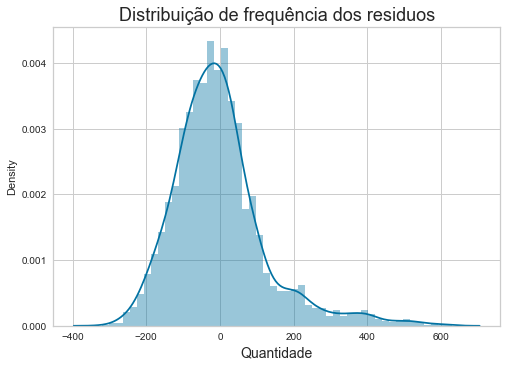

In [87]:
ax = sns.distplot(residuo)
ax.set_title("Distribuição de frequência dos residuos",fontsize=18)
ax.set_xlabel("Quantidade",fontsize=14)
ax